# Analyze Source Collection and Target File

In this notebook we will:
- Analyze our custom source sound collection by extracting features from each sound file.
- Analyze a target audio file that will later be reconstructed using sound chunks from the source collection.
- Experiment with different frame sizes to see their impact on the analysis.

The audio analysis is performed using our modular function `analyze_sound` (from `src/analysis.py`), which uses Essentia to compute features like loudness and MFCCs.


## Environment Setup and Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import sys
sys.path.append(os.path.abspath(".."))

# Import our analysis function from the module
from src.analysis import analyze_sound

# (Optionally) import config if you want to refer to default paths
from src import config

# Define file paths used in this notebook (you can change these as needed)
# Source collection metadata CSV generated from the previous notebook
SOURCE_METADATA_FILE = '../data/metadata/fonts_collection.csv'
# Where to store analysis results for the source collection:
SOURCE_ANALYSIS_FILE = '../data/metadata/source_analysis.csv'
# Where to store analysis results for the target file:
TARGET_ANALYSIS_FILE = '../data/metadata/target_analysis.csv'


[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


## Analyze the Source Collection

This cell loads our previously generated source collection metadata, then iterates over each sound file to analyze it using analyze_sound with a specified frame size (here set to 8192 samples). The results (which include features like loudness and MFCC coefficients) are accumulated into a DataFrame and saved to a CSV file. We can experiment with the frame_size_source value to see how different chunk lengths affect the analysis.

In [2]:
# Load the metadata DataFrame of our source collection
df_source_metadata = pd.read_csv(SOURCE_METADATA_FILE)
print(f"Loaded source metadata with {len(df_source_metadata)} entries.")

# List to accumulate analysis results from each sound file
source_analysis_results = []

# Experiment with a frame size (in samples); try adjusting this value (e.g., 4096, 8192, etc.)
frame_size_source = 8192

# Loop over each sound in our source collection and analyze it
for i, row in df_source_metadata.iterrows():
    print(f"Analyzing source sound with Freesound ID {row['freesound_id']} [{i+1}/{len(df_source_metadata)}]")
    try:
        # Analyze the sound file. Note that we pass frame_size_source and the sound's ID.
        analysis_output = analyze_sound(row['path'], frame_size=frame_size_source, audio_id=row['freesound_id'])
        source_analysis_results.extend(analysis_output)
    except Exception as e:
        print(f"Error analyzing sound {row['freesound_id']}: {e}")

# Convert the analysis results into a DataFrame and save it
df_source_analysis = pd.DataFrame(source_analysis_results)
df_source_analysis.to_csv(SOURCE_ANALYSIS_FILE, index=False)
print(f"Saved source analysis with {len(df_source_analysis)} frames to {SOURCE_ANALYSIS_FILE}")

# Display a preview and summary statistics
display(df_source_analysis.head())
display(df_source_analysis.describe())


Loaded source metadata with 88 entries.
Analyzing source sound with Freesound ID 729455 [1/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 209660 [2/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 403708 [3/88]
Analyzing source sound with Freesound ID 403709 [4/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 403711 [5/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 403704 [6/88]
Analyzing source sound with Freesound ID 403706 [7/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 403712 [8/88]
Analyzing source sound with Freesound ID 403710 [9/88]
Analyzing source sound with Freesound ID 751118 [10/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 504679 [11/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 34015 [12/88]
Analyzing source sound with Freesound ID 24175 [13/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 276061 [14/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 133883 [15/88]
Analyzing source sound with Freesound ID 207730 [16/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 640769 [17/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 2413 [18/88]
Analyzing source sound with Freesound ID 736503 [19/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 234019 [20/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 198996 [21/88]
Analyzing source sound with Freesound ID 521279 [22/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 154914 [23/88]
Analyzing source sound with Freesound ID 700902 [24/88]
Analyzing source sound with Freesound ID 102366 [25/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 102472 [26/88]
Analyzing source sound with Freesound ID 621180 [27/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 749826 [28/88]
Analyzing source sound with Freesound ID 738111 [29/88]
Analyzing source sound with Freesound ID 738104 [30/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 120968 [31/88]
Analyzing source sound with Freesound ID 121026 [32/88]
Analyzing source sound with Freesound ID 121009 [33/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 391430 [34/88]
Analyzing source sound with Freesound ID 350184 [35/88]
Analyzing source sound with Freesound ID 407739 [36/88]
Analyzing source sound with Freesound ID 249194 [37/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 121062 [38/88]
Analyzing source sound with Freesound ID 121020 [39/88]
Analyzing source sound with Freesound ID 738143 [40/88]
Analyzing source sound with Freesound ID 516443 [41/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 517211 [42/88]
Analyzing source sound with Freesound ID 641703 [43/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 381268 [44/88]
Analyzing source sound with Freesound ID 373872 [45/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 373781 [46/88]
Analyzing source sound with Freesound ID 193328 [47/88]
Analyzing source sound with Freesound ID 648108 [48/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 413864 [49/88]
Analyzing source sound with Freesound ID 413481 [50/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 414780 [51/88]
Analyzing source sound with Freesound ID 413356 [52/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 704253 [53/88]
Analyzing source sound with Freesound ID 413358 [54/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 536010 [55/88]
Analyzing source sound with Freesound ID 496243 [56/88]
Analyzing source sound with Freesound ID 591746 [57/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 546216 [58/88]
Analyzing source sound with Freesound ID 549912 [59/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 559519 [60/88]
Analyzing source sound with Freesound ID 413357 [61/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 413362 [62/88]
Analyzing source sound with Freesound ID 546493 [63/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 548251 [64/88]
Analyzing source sound with Freesound ID 655196 [65/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 257497 [66/88]
Analyzing source sound with Freesound ID 560884 [67/88]
Analyzing source sound with Freesound ID 553945 [68/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 11909 [69/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 753248 [70/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 27567 [71/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 368707 [72/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 11862 [73/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 231717 [74/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 677523 [75/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 697037 [76/88]
Analyzing source sound with Freesound ID 585825 [77/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 634346 [78/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 185480 [79/88]
Analyzing source sound with Freesound ID 262353 [80/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 245756 [81/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 152601 [82/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 245318 [83/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 58958 [84/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 242080 [85/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 757714 [86/88]
Analyzing source sound with Freesound ID 369268 [87/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 254914 [88/88]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Saved source analysis with 4593 frames to ../data/metadata/source_analysis.csv



[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank

,freesound_id,id,path,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,key,scale,key_strength
0,729455,729455_f0,../data/raw/729455_4508519-hq.ogg,0,8192,0.003247,-704.681335,113.439499,-65.286011,66.502510,...,9.295612,-14.190033,-23.776194,-14.403461,-27.286503,-10.121098,25.587143,D,minor,0.688942
1,729455,729455_f1,../data/raw/729455_4508519-hq.ogg,8192,16384,0.001464,-753.085815,112.390289,-54.221245,26.110188,...,-15.876232,1.053978,-32.958267,-18.986176,-0.218048,-1.797928,-1.007133,G,minor,0.821799
2,729455,729455_f2,../data/raw/729455_4508519-hq.ogg,16384,24576,0.002545,-720.393677,104.749451,-61.996025,8.408897,...,-17.138453,4.638542,-20.580395,-2.864510,-21.260313,-6.106937,29.082233,D,minor,0.832618
3,729455,729455_f3,../data/raw/729455_4508519-hq.ogg,24576,32768,0.005281,-679.244080,107.973038,-37.173454,8.049618,...,-33.275185,-0.100544,-8.251238,-9.329491,-17.279022,1.897551,9.122488,G,minor,0.896149
4,729455,729455_f4,../data/raw/729455_4508519-hq.ogg,32768,40960,0.003565,-672.231873,105.271835,7.419460,18.165518,...,-20.048809,-0.615852,-30.857676,-7.267727,-18.205582,-9.452154,14.265247,D,minor,0.698118


,freesound_id,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,key_strength
count,4593.000000,4.593000e+03,4.593000e+03,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,374840.079686,3.086759e+05,3.168679e+05,0.003431,-923.914856,164.169846,34.429306,20.873379,1.680963,-0.160732,-2.063607,1.615373,1.497056,-1.352777,-4.474872,-1.177044,0.754187,0.672582
std,227095.828223,2.623869e+05,2.623869e+05,0.003591,170.685471,95.497787,75.389778,43.378658,32.736893,26.079618,22.359234,18.906786,18.477535,17.025318,17.976851,16.234211,15.916707,0.168253
min,2413.000000,0.000000e+00,8.192000e+03,0.000000,-1264.911621,-149.024048,-200.572815,-158.507263,-110.088768,-103.805016,-94.117004,-68.408096,-67.966377,-67.837723,-91.721352,-54.054478,-54.934540,0.000000
25%,209660.000000,1.064960e+05,1.146880e+05,0.000780,-1057.936523,100.030197,-19.420132,-2.947781,-19.236111,-16.851128,-16.605934,-10.838234,-10.445175,-11.836021,-12.817038,-11.425991,-7.805405,0.577953
50%,403704.000000,2.375680e+05,2.457600e+05,0.002352,-950.079590,183.615997,28.626644,21.398970,2.023647,2.545940,-0.078331,2.904980,1.367100,-0.948898,-2.992748,-1.706642,0.418066,0.700547
75%,549912.000000,4.587520e+05,4.669440e+05,0.005003,-781.741211,236.198883,97.870544,47.931927,25.119286,17.949615,14.813976,13.983486,12.288731,8.488506,5.348782,6.910435,6.695465,0.801568
max,757714.000000,1.261568e+06,1.269760e+06,0.025647,-536.200073,323.249664,192.314407,125.127899,97.244408,72.950676,75.246361,87.979393,78.559357,84.800934,63.671112,62.403748,75.789688,0.955456


## Analyze the Target File 

This cell analyzes a target audio file (set by TARGET_SOUND_PATH) using our analyze_sound function with a specified frame size (here 4096 samples). It saves the results to a CSV file, then plots the waveform of the target audio with vertical lines indicating the frame start points. You can experiment with both different frame sizes and the sync_with_beats flag to see how segmentation changes.

Analyzing target sound: ../data/Target.mp3


[   INFO   ] TriangularBands: input spectrum size (12545) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12289) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12545) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12545) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12289) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12289) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (12545) does not correspond to the "inputSize" parameter (1025). Recomputing the filte

Saved target analysis with 372 frames to ../data/metadata/target_analysis.csv


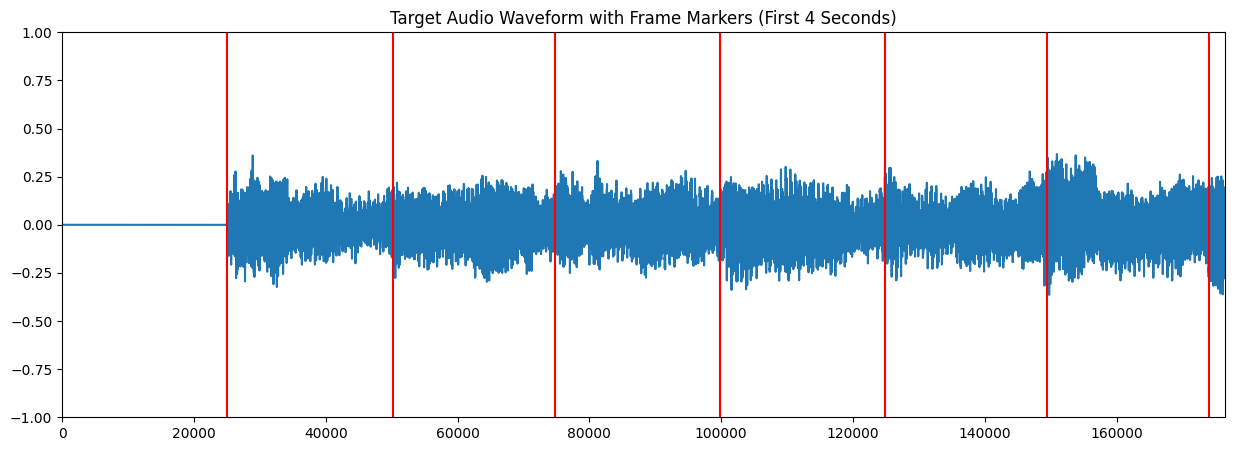

,freesound_id,id,path,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,key,scale,key_strength
0,None,None_f0,../data/Target.mp3,25088,50176,0.001332,-786.982300,162.605286,-5.566051,9.682838,...,-0.164719,-7.657536,7.438652,-3.636311,-14.477100,-19.772602,-7.062456,B,major,0.813798
1,None,None_f1,../data/Target.mp3,50176,74752,0.001434,-785.089417,171.155472,-13.801250,19.831203,...,-1.009605,-2.662537,8.186188,-1.731682,-4.698568,-18.959557,-5.528143,B,minor,0.832496
2,None,None_f2,../data/Target.mp3,74752,99840,0.001318,-786.341064,165.768585,-10.443653,16.171089,...,-5.578680,-2.303303,17.917934,-0.865295,-4.126884,-6.603920,6.736691,B,minor,0.824460
3,None,None_f3,../data/Target.mp3,99840,124928,0.001513,-781.794067,168.110001,-3.368690,23.135181,...,-6.522726,-0.087048,6.614422,-5.170502,-18.642138,-12.595329,-1.710548,B,minor,0.838895
4,None,None_f4,../data/Target.mp3,124928,149504,0.001368,-795.290649,166.388947,-4.968132,20.524147,...,-3.898361,-2.499470,-3.009056,-0.267761,-13.407059,-5.228981,7.960728,B,minor,0.836822


,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,key_strength
count,3.720000e+02,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,4.615965e+06,4.640712e+06,0.001663,-849.255066,191.349594,-15.515751,33.773277,5.727875,-4.930967,-11.479882,-1.412794,-3.269217,3.533183,-12.866382,-7.851548,6.331175,0.825846
std,2.657002e+06,2.656998e+06,0.000956,64.012543,31.124296,21.395731,17.441055,11.993321,13.840583,10.601744,11.887795,10.041424,10.264237,10.205791,8.647322,10.252692,0.061970
min,2.508800e+04,5.017600e+04,0.000080,-1065.389404,32.268597,-117.007141,-30.048466,-45.261803,-55.281017,-54.880096,-41.537956,-36.937996,-30.039642,-57.422119,-34.913368,-44.545349,0.375761
25%,2.326016e+06,2.350976e+06,0.001072,-891.114990,174.391338,-27.265577,25.480751,0.551235,-12.321594,-16.834099,-8.767574,-9.175421,-2.692692,-19.081692,-13.451717,0.044312,0.809868
50%,4.614912e+06,4.639744e+06,0.001556,-841.558319,196.509949,-13.373953,38.051153,7.094002,-2.760990,-10.672426,-1.187962,-2.436525,3.784052,-12.865722,-8.232363,5.977972,0.837922
75%,6.906880e+06,6.931456e+06,0.001938,-796.270630,213.594433,-2.285215,44.892222,14.239924,4.751508,-4.987478,5.951110,4.091456,10.423351,-5.076583,-2.641880,12.036751,0.858255
max,9.204224e+06,9.230848e+06,0.005878,-731.566956,245.106445,35.672878,70.061829,31.480766,34.037025,15.705307,34.504845,24.391384,32.210102,20.206432,34.993771,55.302311,0.959852


In [4]:
# Target file to analyze (change this to try different target files)
TARGET_SOUND_PATH = '../data/Target.mp3'

# Analyze the target audio file. You can try different target files by changing TARGET_SOUND_PATH.
print(f"Analyzing target sound: {TARGET_SOUND_PATH}")

# Experiment with a different frame size for the target file if desired (e.g., 4096 samples)
frame_size_target = 4096

# Analyze the target sound file; optionally, set sync_with_beats=True to test beat-synchronized segmentation.
target_analysis = analyze_sound(TARGET_SOUND_PATH, frame_size=frame_size_target, sync_with_beats=True)

# Convert target analysis results into a DataFrame and save it
df_target_analysis = pd.DataFrame(target_analysis)
df_target_analysis.to_csv(TARGET_ANALYSIS_FILE, index=False)
print(f"Saved target analysis with {len(df_target_analysis)} frames to {TARGET_ANALYSIS_FILE}")

# Plot the waveform of the target file with segmentation markers
import essentia.standard as estd
loader = estd.MonoLoader(filename=TARGET_SOUND_PATH)
audio = loader()
plt.figure(figsize=(15,5))
plt.plot(audio)
plt.vlines(df_target_analysis['start_sample'].values, -1, 1, color='red')
plt.axis([0, min(len(audio), 44100*4), -1, 1])
plt.title('Target Audio Waveform with Frame Markers (First 4 Seconds)')
plt.show()

# Display a preview and summary statistics of the target analysis DataFrame
display(df_target_analysis.head())
display(df_target_analysis.describe())
